# Classifying Movie Reviews

## Loading the IMDB dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/home/hailoc12/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Encoding the integer sequences into a binary matrix

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
print(train_data[0])
x_train[0]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


array([0., 1., 1., ..., 0., 0., 0.])

## Building your network

In [4]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Validating your approach

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.5085 - acc: 0.7811 - val_loss: 0.3798 - val_acc: 0.8682
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.3005 - acc: 0.9047 - val_loss: 0.3003 - val_acc: 0.8904
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2179 - acc: 0.9279 - val_loss: 0.3080 - val_acc: 0.8720
Epoch 4/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1750 - acc: 0.9435 - val_loss: 0.2841 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.3145 - val_acc: 0.8779
Epoch 7/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.0978 - acc: 0.9709 - val_loss: 0.3128 - 

In [8]:
history_dict = history.history

print(history_dict)
print(history_dict.keys())

{'val_loss': [0.3797828854084015, 0.3002715509414673, 0.3079736710548401, 0.2841241054534912, 0.2848057008743286, 0.3144849942207336, 0.31277039461135864, 0.38481982126235964, 0.3629287442207336, 0.3844948916912079, 0.4168118339538574, 0.4504692768096924, 0.469646422958374, 0.5019171131134034, 0.5330981777667999, 0.5723818145751953, 0.6249923308372498, 0.6434890565872192, 0.722546506023407, 0.7023214141845703], 'val_acc': [0.8681999997138977, 0.8904000003814697, 0.8720000001907349, 0.8833000001907348, 0.8865000002861023, 0.8778999999046325, 0.8843999999046326, 0.8657999997138977, 0.8781000000953675, 0.8795000001907348, 0.8767999998092652, 0.8702999998092651, 0.8732999997138977, 0.8718999996185303, 0.8698999998092651, 0.8685999995231628, 0.8638999995231629, 0.8668999996185303, 0.857299999332428, 0.8665999993324279], 'loss': [0.5084701643625895, 0.3004595262050629, 0.21794473245143892, 0.1750387565612793, 0.14262313640117646, 0.1149463941415151, 0.09781807516415914, 0.08066852335135143, 

## Plotting the training and validation loss

In [9]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

## Plotting the training and validation accuracy

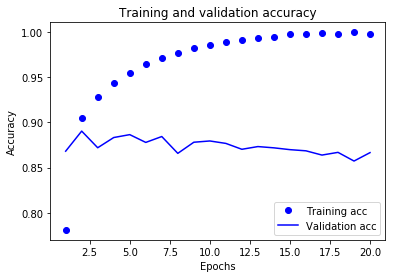

In [10]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

You can see that after the fourth epoch, the model became overfitting

## Retraining a model from scratch

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.4738 - acc: 0.8214
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2673 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2033 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 3s 108us/step


In [12]:
results

[0.3115302325344086, 0.87616]

## Using a trained network to generate predictions on new data

In [13]:
model.predict(x_test)

array([[0.16038847],
       [0.99983764],
       [0.3988123 ],
       ...,
       [0.0812938 ],
       [0.04885972],
       [0.452823  ]], dtype=float32)

# Further experiments

The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
- You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
- Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
- Try using the mse loss function instead of binary_crossentropy.
- Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

## Experiment 1: Using one hidden layer

### Building the model

In [14]:
model1 = models.Sequential()

model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

### Compiling the model

In [15]:
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Training the model

In [16]:
history1 = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.5050 - acc: 0.7990 - val_loss: 0.3995 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.3262 - acc: 0.9012 - val_loss: 0.3317 - val_acc: 0.8782
Epoch 3/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2527 - acc: 0.9245 - val_loss: 0.2939 - val_acc: 0.8877
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2071 - acc: 0.9379 - val_loss: 0.2792 - val_acc: 0.8910
Epoch 5/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1750 - acc: 0.9463 - val_loss: 0.2752 - val_acc: 0.8899
Epoch 6/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1504 - acc: 0.9555 - val_loss: 0.2759 - val_acc: 0.8895
Epoch 7/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1321 - acc: 0.9620 - val_loss: 0.2815 - 

### Plotting the training and validation loss

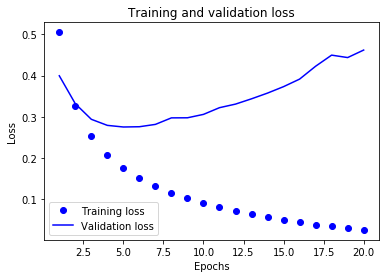

In [17]:
import matplotlib.pyplot as plt

history_dict = history1.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

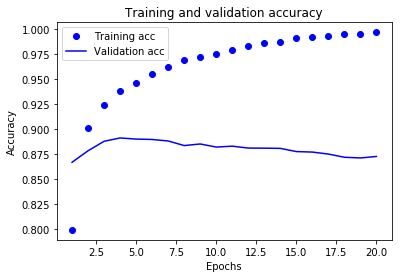

In [18]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Note
Accuracy is very high.

This model converge too fast that just after 1 epochs,it became overfitting.


## Retraining the model

In [19]:
model1.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1935 - acc: 0.9470
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1450 - acc: 0.9572
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.1224 - acc: 0.9627
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1043 - acc: 0.9684


In [20]:
model1.evaluate(x_train, y_train)

25000/25000 [==============================] - 2s 99us/step


[0.08373737607777118, 0.9766]

## Experiment 2: Using 5 layers

In [21]:
model2 = models.Sequential()

model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history2 = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.5486 - acc: 0.7653 - val_loss: 0.3935 - val_acc: 0.8601
Epoch 2/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2986 - acc: 0.8971 - val_loss: 0.3260 - val_acc: 0.8698
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2138 - acc: 0.9255 - val_loss: 0.2823 - val_acc: 0.8907
Epoch 4/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1619 - acc: 0.9423 - val_loss: 0.3413 - val_acc: 0.8683
Epoch 5/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1308 - acc: 0.9558 - val_loss: 0.3992 - val_acc: 0.8651
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1071 - acc: 0.9665 - val_loss: 0.3403 - val_acc: 0.8818
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0798 - acc: 0.9755 - val_loss: 0.3693 - 

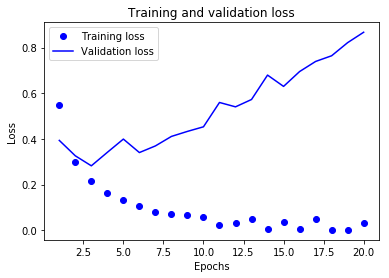

In [24]:
import matplotlib.pyplot as plt

history_dict = history2.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

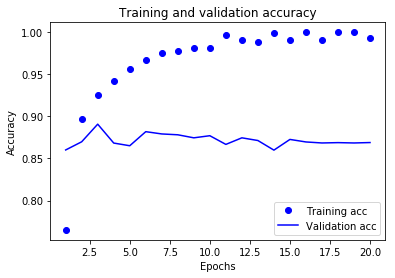

In [25]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Retraining the model

In [26]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.1452 - acc: 0.9500
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.1285 - acc: 0.9550
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1123 - acc: 0.9616
Epoch 4/4
25000/25000 [==============================] - 2s 100us/step


In [27]:
results

[0.37310753056526186, 0.87156]